In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# load the dataset
df = pd.read_csv("Unemployment in India.csv")   # file name may vary
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB
None
       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std          

In [6]:
df.columns = df.columns.str.strip()
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [8]:
df['Date'] = df['Date'].str.strip()


In [9]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")


In [10]:
df.dtypes


Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
dtype: object

In [11]:
df.columns = df.columns.str.strip()

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()


In [12]:
cat_cols = ['Region', 'Frequency', 'Area']

for col in cat_cols:
    df[col] = df[col].astype('category')


In [13]:
df.dtypes

Region                                           category
Date                                       datetime64[ns]
Frequency                                        category
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                             category
dtype: object

# Unemployment Trend Over Time (National Level)

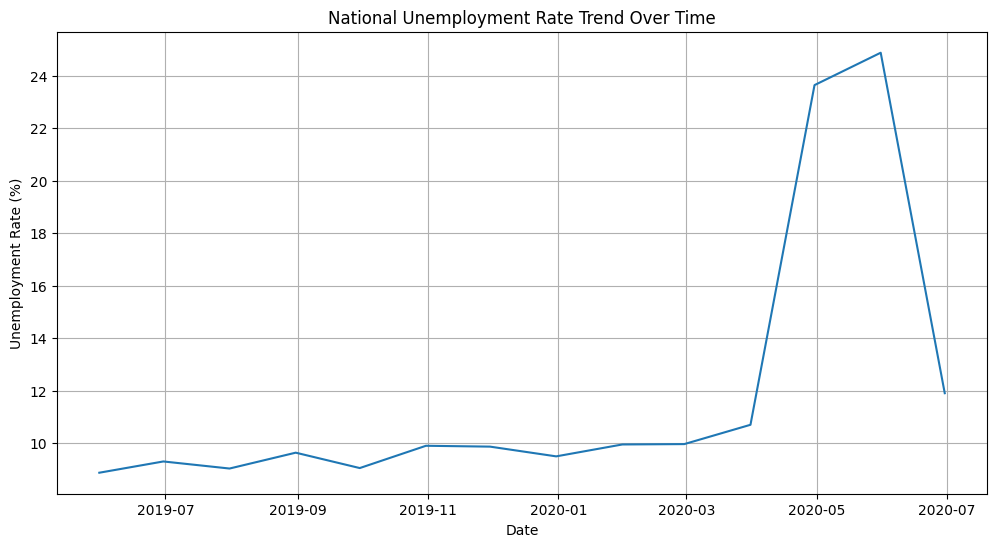

In [14]:
national = df.groupby("Date")["Estimated Unemployment Rate (%)"].mean()

plt.figure(figsize=(12,6))
plt.plot(national.index, national.values)
plt.title("National Unemployment Rate Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.show()


# State-wise Average Unemployment

In [15]:
state_avg = df.groupby("Region")["Estimated Unemployment Rate (%)"].mean().sort_values(ascending=False)
state_avg.head(10)


C:\Users\IPL4\AppData\Local\Temp\ipykernel_11300\1400919429.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_avg = df.groupby("Region")["Estimated Unemployment Rate (%)"].mean().sort_values(ascending=False)


Region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Delhi               16.495357
Jammu & Kashmir     16.188571
Chandigarh          15.991667
Rajasthan           14.058214
Uttar Pradesh       12.551429
Name: Estimated Unemployment Rate (%), dtype: float64

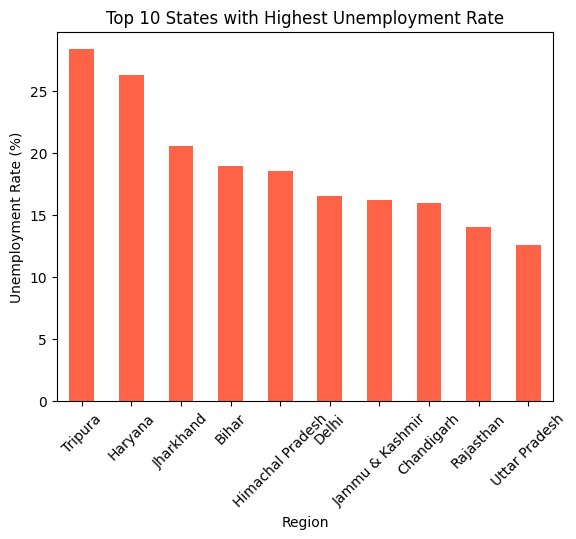

In [16]:
state_avg.head(10).plot(kind='bar', color='tomato')
plt.title("Top 10 States with Highest Unemployment Rate")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.show()


# Urban vs Rural Unemployment

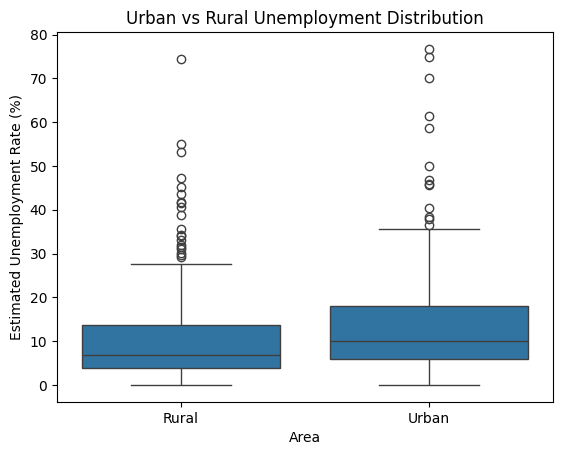

In [17]:
sns.boxplot(x="Area", y="Estimated Unemployment Rate (%)", data=df)
plt.title("Urban vs Rural Unemployment Distribution")
plt.show()


# Unemployment By Frequency (Monthly)

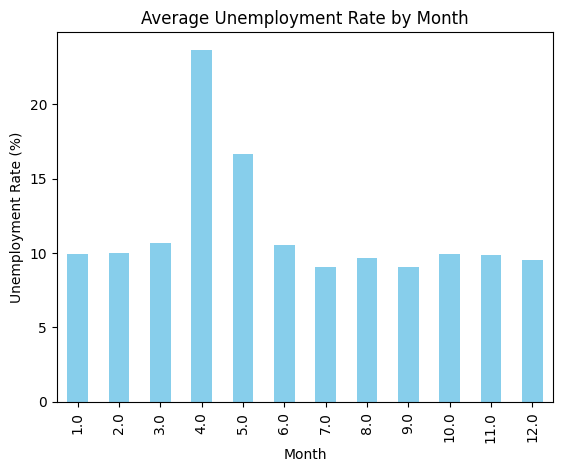

In [18]:
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby("Month")["Estimated Unemployment Rate (%)"].mean()

monthly_avg.plot(kind='bar', color='skyblue')
plt.title("Average Unemployment Rate by Month")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.show()


# Correlation Heatmap

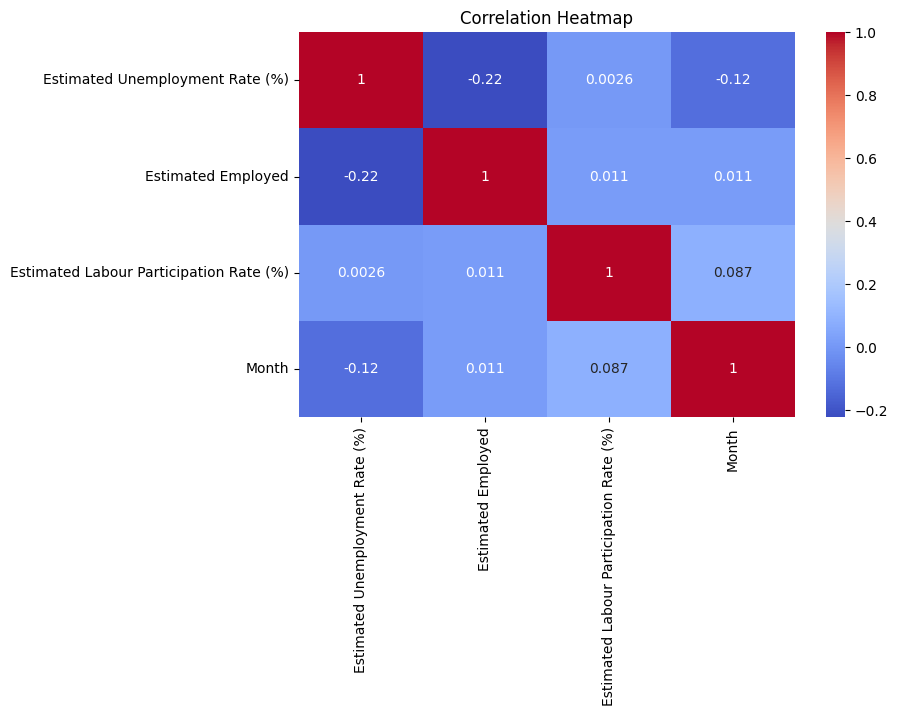

In [20]:
# Select only numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# Conclusion

The unemployment analysis of India from 2019–2020 reveals several important trends:

Unemployment spiked sharply during early 2020, especially around April–June 2020, which aligns with nationwide lockdown and pandemic restrictions.

Some states consistently showed higher unemployment rates, while others maintained relatively stable employment levels.

Urban and Rural unemployment patterns differ, with urban regions typically showing more volatility due to economic shutdowns affecting businesses and services.

Monthly analysis shows clear seasonality, with certain months experiencing predictable rises or drops in unemployment.

The correlation heatmap indicates that:

Unemployment rate has a weak relationship with employment and labour participation rate.

Labour participation does not directly determine unemployment — both depend on economic conditions.

Overall, the dataset clearly reflects the impact of COVID-19 on India’s labour market, demonstrating significant disruption, followed by gradual stabilization.

This analysis provides meaningful insights into how unemployment behaves across states, regions, and time periods. It highlights the importance of monitoring employment trends to understand the economic health of the country, especially during crisis periods like the COVID-19 pandemic.